In [1]:
import os

import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt

In [2]:
%matplotlib widget

## Arbitrary sound

In [3]:
amplitude = 1
f0 = 440
sample_rate = 44100
damping = 2


def make_sound(amplitude, damping):
    times = np.linspace(0, 1, sample_rate)
    waveform = amplitude * np.exp(-damping * times) * np.cos(f0 * times)
    return waveform


waveform = make_sound(amplitude, damping)

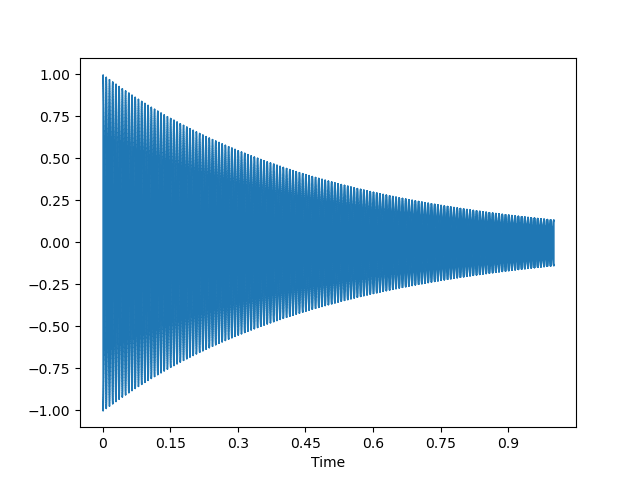

In [4]:
plt.figure()
# Display waveform
librosa.display.waveshow(waveform, sr=sample_rate)
plt.show()

## Sound/no sound criterion

In [5]:
N = len(waveform)

N2_3 = int(2 * N / 3)
criterion = np.mean(np.abs(waveform[N2_3:]))
print(criterion)


def are_there_oscillations(waveform, epsilon):
    N2_3 = int(2 * len(waveform) / 3)
    criterion = np.mean(np.abs(waveform[N2_3:]))
    return criterion > epsilon

0.12222087679658754


## Artificial map

Make dataset complete with labels

In [42]:
# Random
n_points = 100
data_coordinates = np.random.rand(n_points, 2)

In [47]:
wave_dataset = np.zeros((n_points, sample_rate))
labels = np.zeros(n_points)

for i, x in enumerate(data_coordinates):
    ampl, damp = x
    waveform = make_sound(ampl, damp)
    wave_dataset[i] = waveform
    labels[i] = 1 if are_there_oscillations(waveform, epsilon=0.1) else -1

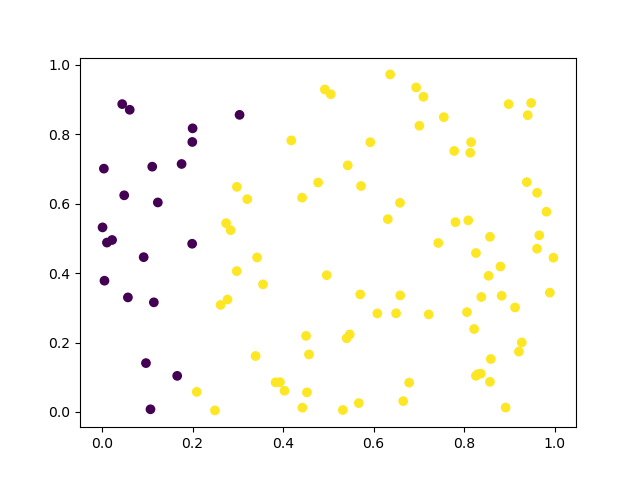

In [48]:
plt.figure()
plt.scatter(data_coordinates[:, 0], data_coordinates[:, 1], c=labels)
plt.show()

## Support Vector Machine

In [61]:
from sklearn.svm import SVC
from sklearn.inspection import DecisionBoundaryDisplay

In [62]:
model = SVC(kernel="rbf")
model.fit(data_coordinates, labels)

SVC()

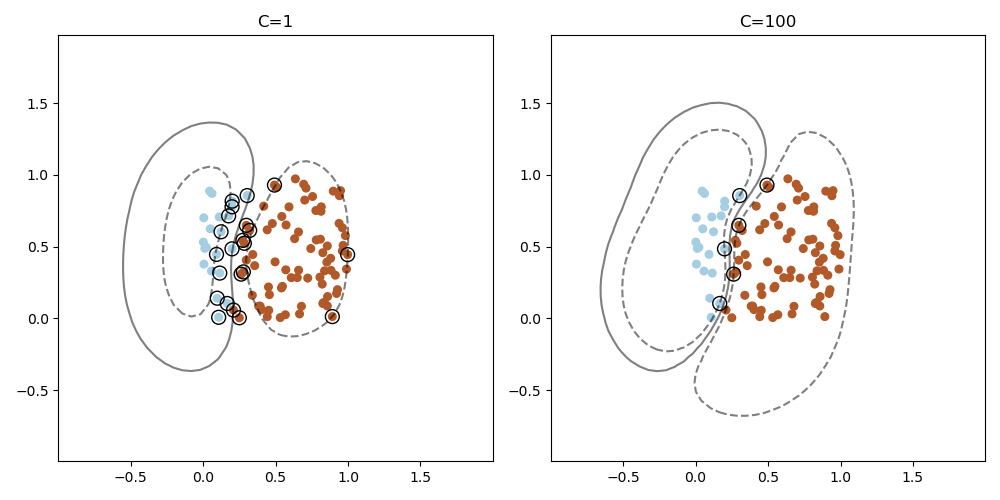

In [73]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.svm import LinearSVC
from sklearn.inspection import DecisionBoundaryDisplay

X, y = data_coordinates, labels

plt.figure(figsize=(10, 5))
for i, C in enumerate([1, 100]):
    # "hinge" is the standard SVM loss
    clf = SVC(C=C, random_state=42).fit(X, y)
    # obtain the support vectors through the decision function
    decision_function = clf.decision_function(X)
    # we can also calculate the decision function manually
    # decision_function = np.dot(X, clf.coef_[0]) + clf.intercept_[0]
    # The support vectors are the samples that lie within the margin
    # boundaries, whose size is conventionally constrained to 1
    support_vector_indices = np.where(np.abs(decision_function) <= 1 + 1e-15)[0]
    support_vectors = X[support_vector_indices]

    plt.subplot(1, 2, i + 1)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired)
    ax = plt.gca()
    DecisionBoundaryDisplay.from_estimator(
        clf,
        X,
        ax=ax,
        grid_resolution=50,
        plot_method="contour",
        colors="k",
        levels=[-1, 0, 1],
        alpha=0.5,
        linestyles=["--", "-", "--"],
    )
    plt.scatter(
        support_vectors[:, 0],
        support_vectors[:, 1],
        s=100,
        linewidth=1,
        facecolors="none",
        edgecolors="k",
    )
    plt.title("C=" + str(C))
plt.tight_layout()
plt.show()